# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.002
-0.002
-0.002
-0.002
0.0
0.0
0.0
0.002
-0.002
-0.003
-0.003
-0.003
0.0
-0.002
-0.003
-0.003
0.984
0.987
0.989
0.988
0.987
1.97
1.97
1.969
2.953
2.954
2.953
2.953
3.939
3.939
3.937
3.938
4.918
4.917
4.916
4.917
5.911
5.911
5.911
5.911
6.668
6.668
6.668
6.667
7.428
7.428
7.428
7.428
8.417
8.417
8.416
8.416
9.395
9.397
9.4
9.399
9.399
10.381
10.383
10.386
10.385
10.385
11.367
11.367
11.37
11.369
12.351
12.35
12.349
12.349
13.33
13.333
13.335
13.335
13.335
13.836
13.838
13.841
13.84
13.84
14.341
14.343
14.346
14.345
14.345
15.322
15.322
15.322
15.321
16.307
16.307
16.305
16.305
17.292
17.291
17.289
17.29
18.278
18.278
18.277
18.277
19.264
19.267
19.276
19.271
19.271
20.262
20.262
20.262
20.262
21.123
21.123
21.122
21.122
21.984
21.984
21.983
21.983
22.96
22.96
22.96
22.96
23.94
23.939
23.938
23.938
24.941
24.941
24.939
24.939
25.92
25.92
25.919
25.919
26.924
26.923
2

56.078
56.077
56.077
56.077
56.077
56.077
56.077
56.077
56.077
56.077
56.077
56.076
56.074
56.073
56.074
56.21
56.21
56.21
56.21
56.21
56.21
56.21
56.21
56.21
56.21
56.223
56.223
56.222
56.222
56.222
56.222
56.221
56.224
56.223
56.223
56.222
56.222
56.221
56.221
56.221
56.221
56.221
56.221
56.22
56.22
56.22
56.219
56.219
56.218
56.218
56.218
56.218
56.218
56.218
56.217
56.217
56.217
56.217
56.217
56.217
56.217
56.217
56.217
56.216
56.215
56.214
56.214
56.215
56.215
56.284
56.308
56.399
56.422
56.422
56.422
56.422
56.438
56.438
56.438
56.437
56.437
56.437
56.437
56.437
56.436
56.436
56.436
56.436
56.435
56.436
56.436
56.435
56.434
56.434
56.434
56.434
56.433
56.433
56.433
56.433
56.432
56.432
56.432
56.432
56.431
56.431
56.431
56.431
56.431
56.431
56.431
56.431
56.431
56.431
56.43
56.43
56.43
56.43
56.43
56.43
56.43
56.43
56.428
56.427
56.427
56.428
56.427
56.611
56.656
56.656
56.672
56.672
56.672
56.672
56.671
56.671
56.671
56.671
56.669
56.669
56.675
56.671
56.67
56.673
56.672
56.671


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1434,2868,58.595
1435,2870,58.595
1436,2872,58.595
1437,2874,58.596


<IPython.core.display.Javascript object>


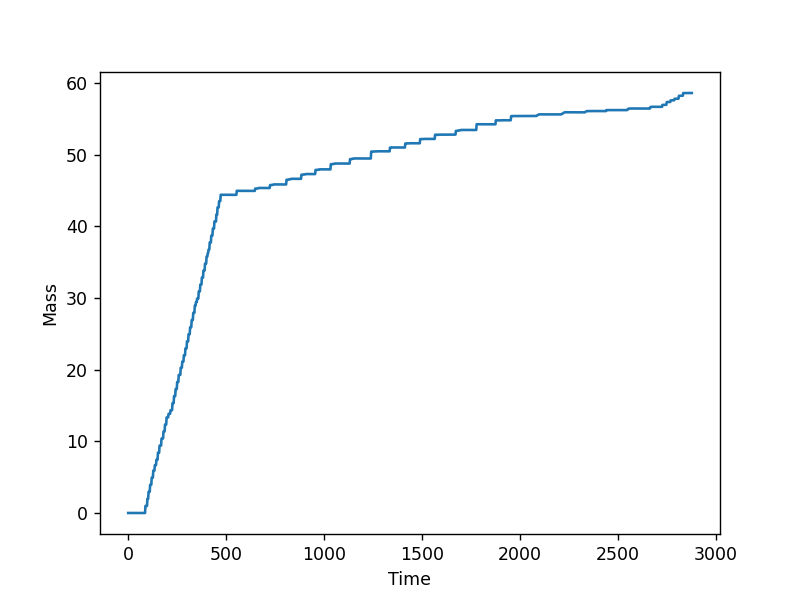

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_270323_S223-228.csv')